In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error, r2_score


In [2]:
# Đọc dữ liệu từ tập tin CSV
df = pd.read_csv('SAMSUNG.csv')


In [3]:
# Chuyển cột 'Date' sang định dạng datetime
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
# Thiết lập cột 'Date' làm chỉ số
df.set_index('Date', inplace=True)

In [5]:
# Chọn cột Close làm biến phụ thuộc
df_Close = df[['Close']]
df_Close = df_Close.reset_index(drop=True)

In [6]:
# Chuẩn hóa dữ liệu với phương pháp Min-Max
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df_Close))

In [7]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỉ lệ 7:3
train_size = int(0.7 * len(data_scaled))
test_size = len(data_scaled) - train_size

train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]


In [8]:
# Chuẩn bị dữ liệu huấn luyện
x_train = np.arange(train_size).reshape(-1, 1)
y_train = train_data.reshape(-1)

In [9]:
# Huấn luyện một mô hình Hồi quy Tuyến tính
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
# Hiển thị các hệ số và R-squared của mô hình
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R-squared:", model.score(x_train, y_train))

Intercept: 0.1561721101126386
Coefficients: [0.00051452]
R-squared: 0.3747095728709716


In [11]:
# Chuẩn bị dữ liệu kiểm tra
x_test = np.arange(train_size, len(data_scaled)).reshape(-1, 1)
y_test = test_data.reshape(-1)

In [12]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(x_test)

In [13]:
# Đánh giá độ chính xác trên tập kiểm tra
test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"MAPE trên tập kiểm tra: {test_mape}")
print(f"RMSE trên tập kiểm tra: {test_rmse}")
print(f"MSLE trên tập kiểm tra: {test_msle}")
print(f"R² trên tập kiểm tra: {test_r2}")

MAPE trên tập kiểm tra: 0.5708100588245345
RMSE trên tập kiểm tra: 0.29037505854840717
MSLE trên tập kiểm tra: 0.03125657447380541
R² trên tập kiểm tra: -4.263758312990684


In [14]:
# Tạo dự đoán cho 30 ngày tiếp theo sau khi hoàn thành kiểm tra
last_index =  df_Close.index[-1]
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
y_next_30_days = scaler.inverse_transform(np.array([y_next_30_days]).reshape(-1, 1))


In [15]:
# In ra dự đoán giá đóng cửa cho 30 ngày tiếp theo
print('Dự đoán giá đóng cửa cho 30 ngày tiếp theo:')
print(y_next_30_days.flatten())

Dự đoán giá đóng cửa cho 30 ngày tiếp theo:
[88615.92989428 88641.55275066 88667.17560703 88692.7984634
 88718.42131978 88744.04417615 88769.66703253 88795.2898889
 88820.91274527 88846.53560165 88872.15845802 88897.7813144
 88923.40417077 88949.02702714 88974.64988352 89000.27273989
 89025.89559627 89051.51845264 89077.14130901 89102.76416539
 89128.38702176 89154.00987814 89179.63273451 89205.25559088
 89230.87844726 89256.50130363 89282.12416001 89307.74701638
 89333.36987276 89358.99272913]


In [16]:
# Lấy ngày cuối cùng từ chỉ số hiện tại
last_date = df.index[-1]

In [17]:
# Thêm một ngày vào ngày cuối cùng
next_date = last_date + pd.DateOffset(days=1)

In [18]:
# Tạo danh sách chỉ số bắt đầu từ ngày tiếp theo trong 30 ngày tới
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

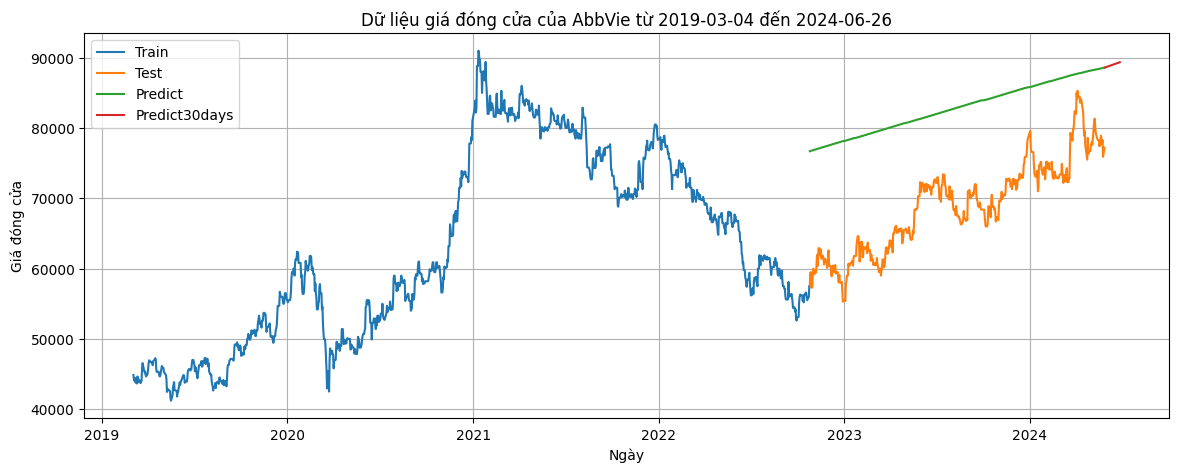

In [19]:
# Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Vẽ dữ liệu huấn luyện
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

# Vẽ dữ liệu kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(test_data))

# Vẽ dự đoán trên tập kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(y_pred.reshape(-1, 1)))

# Vẽ dự đoán cho 30 ngày tiếp theo
plt.plot(index_next_30_days, y_next_30_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])

plt.grid()
plt.title(f"Dữ liệu giá đóng cửa của AbbVie từ {df.index[0].strftime('%Y-%m-%d')} đến {index_next_30_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Ngày")
plt.ylabel("Giá đóng cửa")
plt.show()

In [20]:
# Tạo dự đoán cho 60 ngày tiếp theo
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)
y_next_60_days = scaler.inverse_transform(np.array([y_next_60_days]).reshape(-1, 1))

In [21]:
# In ra dự đoán giá đóng cửa cho 60 ngày tiếp theo
print('Dự đoán giá đóng cửa cho 60 ngày tiếp theo:')
print(y_next_60_days.flatten())

Dự đoán giá đóng cửa cho 60 ngày tiếp theo:
[88615.92989428 88641.55275066 88667.17560703 88692.7984634
 88718.42131978 88744.04417615 88769.66703253 88795.2898889
 88820.91274527 88846.53560165 88872.15845802 88897.7813144
 88923.40417077 88949.02702714 88974.64988352 89000.27273989
 89025.89559627 89051.51845264 89077.14130901 89102.76416539
 89128.38702176 89154.00987814 89179.63273451 89205.25559088
 89230.87844726 89256.50130363 89282.12416001 89307.74701638
 89333.36987276 89358.99272913 89384.6155855  89410.23844188
 89435.86129825 89461.48415463 89487.107011   89512.72986737
 89538.35272375 89563.97558012 89589.5984365  89615.22129287
 89640.84414924 89666.46700562 89692.08986199 89717.71271837
 89743.33557474 89768.95843111 89794.58128749 89820.20414386
 89845.82700024 89871.44985661 89897.07271298 89922.69556936
 89948.31842573 89973.94128211 89999.56413848 90025.18699485
 90050.80985123 90076.4327076  90102.05556398 90127.67842035]


In [22]:
# Tạo danh sách chỉ số bắt đầu từ ngày tiếp theo trong 60 ngày tới
index_next_60_days = pd.date_range(start=next_date, periods=60).tolist()

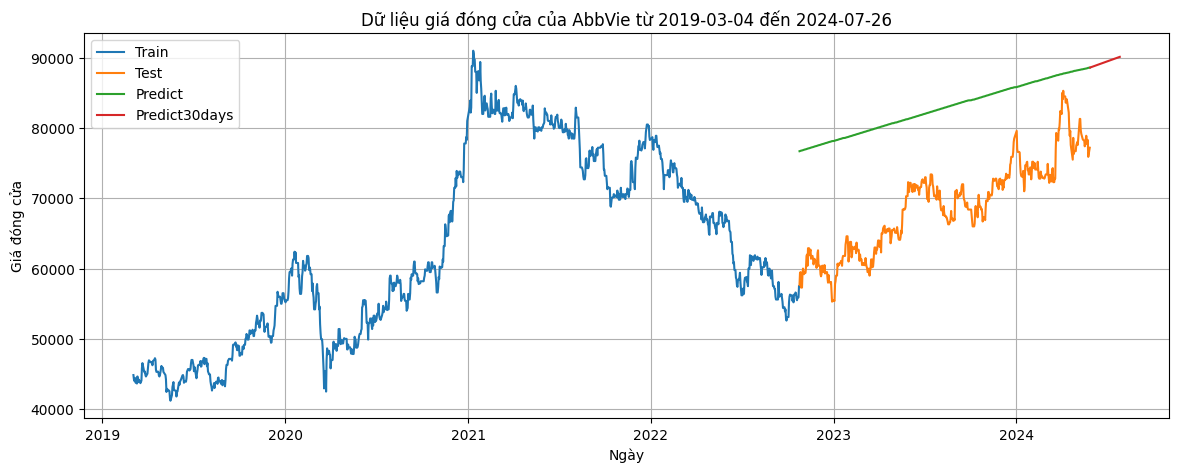

In [23]:
 # Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Vẽ dữ liệu huấn luyện
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

# Vẽ dữ liệu kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(test_data))

# Vẽ dự đoán trên tập kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(y_pred.reshape(-1, 1)))

# Vẽ dự đoán cho 60 ngày tiếp theo
plt.plot(index_next_60_days, y_next_60_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])

plt.grid()
plt.title(f"Dữ liệu giá đóng cửa của AbbVie từ {df.index[0].strftime('%Y-%m-%d')} đến {index_next_60_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Ngày")
plt.ylabel("Giá đóng cửa")
plt.show()

In [24]:
# Tạo dự đoán cho 90 ngày tiếp theo
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)
y_next_90_days = scaler.inverse_transform(np.array([y_next_90_days]).reshape(-1, 1))

In [25]:
# Tạo danh sách chỉ số bắt đầu từ ngày tiếp theo trong 90 ngày tới
index_next_90_days = pd.date_range(start=next_date, periods=90).tolist()

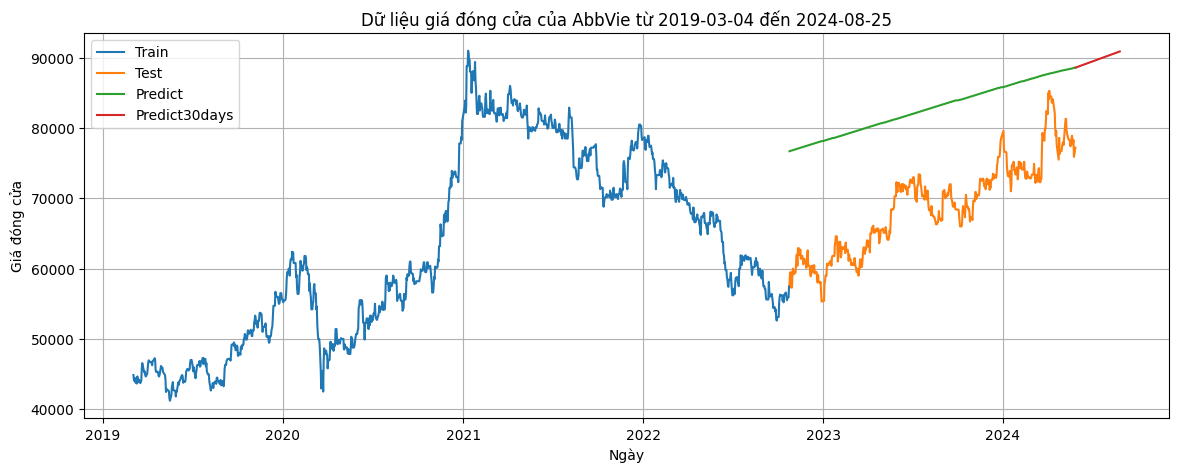

In [26]:
# Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Vẽ dữ liệu huấn luyện
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

# Vẽ dữ liệu kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(test_data))

# Vẽ dự đoán trên tập kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(y_pred.reshape(-1, 1)))

# Vẽ dự đoán cho 90 ngày tiếp theo
plt.plot(index_next_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])

plt.grid()
plt.title(f"Dữ liệu giá đóng cửa của AbbVie từ {df.index[0].strftime('%Y-%m-%d')} đến {index_next_90_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Ngày")
plt.ylabel("Giá đóng cửa")
plt.show()